In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from mpl_toolkits.mplot3d import Axes3D
from google.colab.patches import cv2_imshow

Image pre-processing

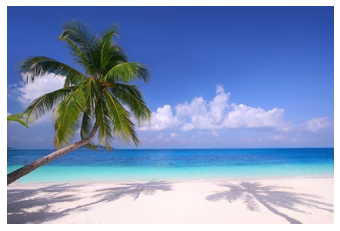

In [2]:
im1 = plt.imread('img')
im = np.copy(im1)
# im = cv2.resize(im, (800,500), interpolation=cv2.INTER_AREA)
plt.imshow(im)
plt.axis('off')
plt.show()

Manual thresholding

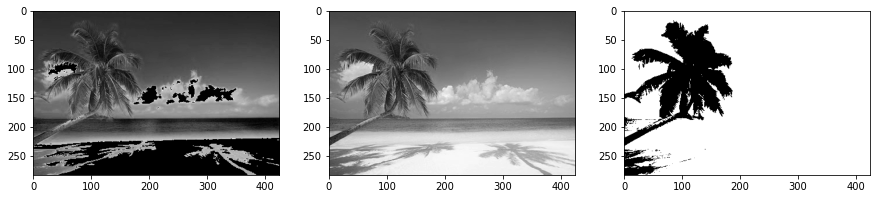

In [3]:
R = im[:,:,0]
G = im[:,:,1]
B = im[:,:,2]

R[R>200] = 0
R[R>199]= 255

B[B<140] = 0
B[B>141] = 255

plt.subplots(figsize=(15,15))
plt.subplot(131)
plt.imshow(R, cmap='gray')

plt.subplot(132)
plt.imshow(G, cmap='gray')

plt.subplot(133)
plt.imshow(B, cmap='gray')

plt.show()

## Use of features: R and B channel

Data distribution


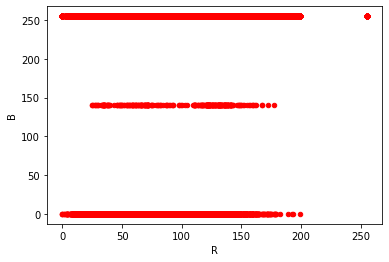

In [4]:
R = R.flatten().reshape(-1,1)
B = B.flatten().reshape(-1,1)

RGB = np.concatenate((R,B),axis=1)

plt.scatter(R, B, c='r', s=20)
plt.xlabel('R')
plt.ylabel('B')
# ax.azim = 75
plt.show()

K-Means from scratch

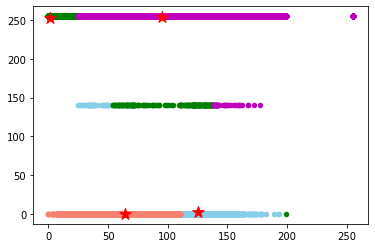

array([[125,   2],
       [ 64,   0],
       [  1, 253],
       [ 95, 254]])

In [8]:
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum(x1-x2)**2)

def k_means(RGB, centroids, num_iter, k):
  distances = np.zeros((RGB.shape[0], k))
  for num_iter in range(num_iter):
    for i in range(len(RGB)):
      for j in range(k):
        distances[i,j] = euclidean_distance(RGB[i], centroids[j])
    global arg
    arg = np.argmin(distances, axis=1)

    for l in range(k):
      centroids[l,:] = np.mean(RGB[arg == l], axis=0)
    # Display group assignment, depending on the number of clusters
    plt.scatter(RGB[arg==0,0], RGB[arg==0,1], c='skyblue', s=20)
    plt.scatter(RGB[arg==1,0], RGB[arg==1,1], c='salmon', s=20)
    plt.scatter(RGB[arg==2,0], RGB[arg==2,1], c='green', s=20)
    plt.scatter(RGB[arg==3,0], RGB[arg==3,1], c='m', s=20)
    plt.scatter(centroids[:,0], centroids[:,1], c='r', s=150, marker='*')
    plt.show()
    return centroids

k = 4
num_iter = 8000
centroids = np.random.randint(255, size=(k, RGB.shape[1]))
c = k_means(RGB, centroids, num_iter, k)
c

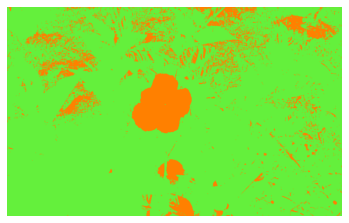

In [ ]:
# K = 2
arg = np.reshape(arg, (im.shape[0], im.shape[1]))
new_im = np.zeros((im.shape[0], im.shape[1], 3)).astype('uint8')

for i in range(im.shape[0]):
  for j in range(im.shape[1]):

    if arg[i,j]==0:
      new_im[i,j,0] = 0
      new_im[i,j,1] = 143
      new_im[i,j,2] = 57
    
    elif arg[i,j]==1:
      new_im[i,j,0] = 100
      new_im[i,j,1] = 240
      new_im[i,j,2] = 60

plt.imshow(new_im)
plt.axis('off')
plt.show()

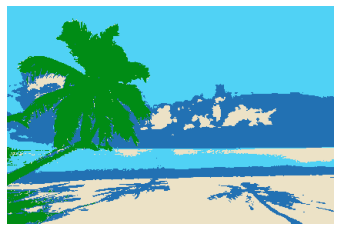

In [50]:
# K = 4
arg = np.reshape(arg, (im.shape[0], im.shape[1]))
new_im = np.zeros((im.shape[0], im.shape[1], 3)).astype('uint8')

for i in range(im.shape[0]):
  for j in range(im.shape[1]):

    if arg[i,j]==3:
      new_im[i,j,0] = 0
      new_im[i,j,1] = 140
      new_im[i,j,2] = 21
    
    elif arg[i,j]==0:
      new_im[i,j,0] = 34
      new_im[i,j,1] = 113
      new_im[i,j,2] = 179

    elif arg[i,j]==1:
      new_im[i,j,0] = 236
      new_im[i,j,1] = 226
      new_im[i,j,2] = 198

    elif arg[i,j]==2:
      new_im[i,j,0] = 80
      new_im[i,j,1] = 210
      new_im[i,j,2] = 245


plt.imshow(new_im)
plt.axis('off')
plt.show()

## Uses three features: R, G and B channel

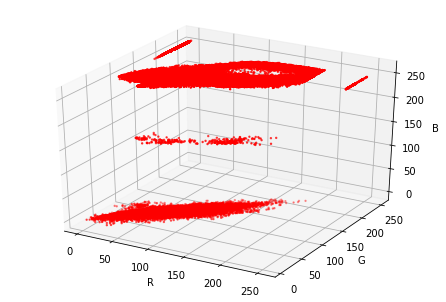

(120275, 3)

In [9]:
R = R.flatten().reshape(-1,1)
G = G.flatten().reshape(-1,1)
B = B.flatten().reshape(-1,1)

RGB = np.concatenate((R,G,B),axis=1)

fig = plt.figure()
ax = Axes3D(fig)

surface = ax.scatter(R, G, B, c='r', s=2)
ax.set_xlabel('R', fontsize=10)
ax.set_ylabel('G', fontsize=10)
ax.set_zlabel('B', fontsize=10)
# ax.azim = 75
plt.show()
RGB.shape

K-means form scracht

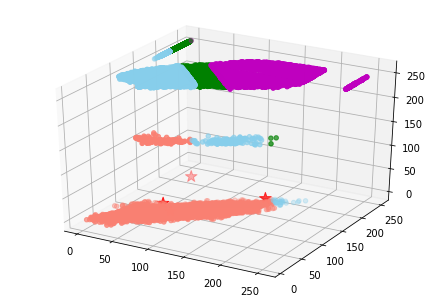

array([[ 51, 100, 254],
       [ 73,  82,   0],
       [ 32, 196, 254],
       [152, 175, 255]])

In [19]:
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum(x1-x2)**2)

def k_means(RGB, centroids, num_iter, k):
  distances = np.zeros((RGB.shape[0], k))
  for num_iter in range(num_iter):
    for i in range(len(RGB)):
      for j in range(k):
        distances[i,j] = euclidean_distance(RGB[i], centroids[j])
    global arg
    arg = np.argmin(distances, axis=1)

    for l in range(k):
      centroids[l,:] = np.mean(RGB[arg == l], axis=0)
    
    # Display group assignment, depending on the number of clusters
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(RGB[arg==0,0], RGB[arg==0,1], RGB[arg==0,2], c='skyblue', s=20)
    ax.scatter(RGB[arg==1,0], RGB[arg==1,1], RGB[arg==1,2], c='salmon', s=20)
    ax.scatter(RGB[arg==2,0], RGB[arg==2,1], RGB[arg==2,2], c='green', s=20)
    ax.scatter(RGB[arg==3,0], RGB[arg==3,1], RGB[arg==3,2], c='m', s=20)
    ax.scatter(centroids[:,0], centroids[:,1], c='r', s=150, marker='*')
    plt.show()
    return centroids
    
k = 4
num_iter = 5000
centroids = np.random.randint(255, size=(k, RGB.shape[1]))
c = k_means(RGB, centroids, num_iter, k)
c

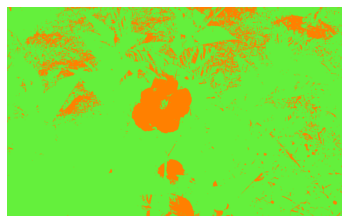

In [ ]:
# k=2
arg = np.reshape(arg, (im.shape[0], im.shape[1]))
new_im = np.zeros((im.shape[0], im.shape[1], 3)).astype('uint8')

for i in range(im.shape[0]):
  for j in range(im.shape[1]):

    if arg[i,j]==0:
      new_im[i,j,0] = 100
      new_im[i,j,1] = 240
      new_im[i,j,2] = 60
    
    elif arg[i,j]==1:
      new_im[i,j,0] = 255
      new_im[i,j,1] = 128
      new_im[i,j,2] = 00

plt.imshow(new_im)
plt.axis('off')
plt.show()

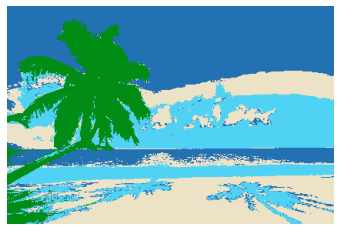

In [21]:
# k=4
arg = np.reshape(arg, (im.shape[0], im.shape[1]))
new_im = np.zeros((im.shape[0], im.shape[1], 3)).astype('uint8')

for i in range(im.shape[0]):
  for j in range(im.shape[1]):

    if arg[i,j]==1: # green color
      new_im[i,j,0] = 0
      new_im[i,j,1] = 140
      new_im[i,j,2] = 21
    
    elif arg[i,j]==0: # blue color
      new_im[i,j,0] = 34
      new_im[i,j,1] = 113
      new_im[i,j,2] = 179

    elif arg[i,j]==2: #sand color
      new_im[i,j,0] = 236
      new_im[i,j,1] = 226
      new_im[i,j,2] = 198

    elif arg[i,j]==3: # aquamarine color
      new_im[i,j,0] = 80
      new_im[i,j,1] = 210
      new_im[i,j,2] = 245

plt.imshow(new_im)
plt.axis('off')
plt.show()